# 1 - Algoritmos de Busca em Grafo Ponderado

# Criação do grafo

In [2]:
# Importa as bibliotecas necessárias
import networkx as nx
import matplotlib.pyplot as plt
import time
from collections import deque # para BFS
import heapq # para UCS
import math # para o calculo da admissibilidade da heuristica do greedy

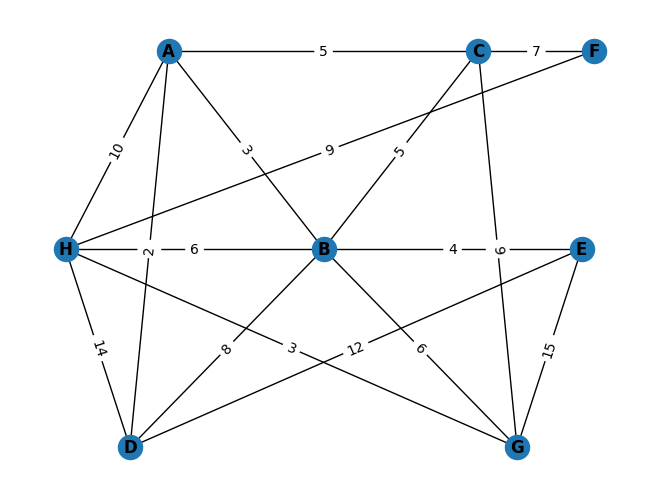

In [3]:
# Cria um grafo não direcionado
G=nx.Graph()

# Adiciona os nós do grafo
G.add_nodes_from(['A','B','C','D','E','F','G','H'])

# Define as posições dos nós para a visualização do grafo
pos = {}
pos['A'] = [-1.2,0.5]
pos['B'] = [0,0]
pos['C'] = [1.2,0.5]
pos['D'] = [-1.5,-0.5]
pos['E'] = [2,0]
pos['F'] = [2.1,0.5]
pos['G'] = [1.5,-0.5]
pos['H'] = [-2,0]

# Adiciona as arestas com seus respectivos pesos (atributo 'weight')
G.add_edges_from([('A', 'H', {'weight': 10})])
G.add_edges_from([('A', 'D', {'weight': 2})])
G.add_edges_from([('A', 'B', {'weight': 3})])
G.add_edges_from([('A', 'C', {'weight': 5})])
G.add_edges_from([('C', 'B', {'weight': 5})])
G.add_edges_from([('C', 'G', {'weight': 9})])
G.add_edges_from([('C', 'F', {'weight': 7})])
G.add_edges_from([('F', 'H', {'weight': 9})])
G.add_edges_from([('H', 'B', {'weight': 6})])
G.add_edges_from([('H', 'G', {'weight': 3})])
G.add_edges_from([('H', 'D', {'weight': 14})])
G.add_edges_from([('B', 'E', {'weight': 4})])
G.add_edges_from([('B', 'G', {'weight': 6})])
G.add_edges_from([('B', 'D', {'weight': 8})])
G.add_edges_from([('E', 'D', {'weight': 12})])
G.add_edges_from([('E', 'G', {'weight': 15})])

# Desenha o grafo com os nós e arestas
nx.draw(G, pos=pos, with_labels=True, font_weight='bold')

# Obtém os pesos das arestas para exibição
edge_labels = nx.get_edge_attributes(G, 'weight')

# Desenha os rótulos dos pesos nas arestas
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

# Exibe o grafo
plt.show()


# Buscas

## Busca em largura (BFS)

### Definição de função BFS

In [4]:
#Implementação da Busca em Largura (BFS)
def bfs(grafo, inicio, destino):
    """
    Executa a busca em largura em um grafo, retornando o caminho encontrado,
    os nós visitados, número de expansões e se chegou ao destino.
    """
    visitados = set()
    fila = deque([(inicio, [inicio])])  # fila de tuplas (nó, caminho até ele)
    todos_visitados = []
    num_expansoes = 0

    while fila:
        vertice, caminho = fila.popleft()

        if vertice not in visitados:
            visitados.add(vertice)
            todos_visitados.append(vertice)
            num_expansoes += 1

            if vertice == destino:
                return {
                    "encontrado": True,
                    "caminho": caminho,
                    "visitados": todos_visitados,
                    "expansoes": num_expansoes
                }

            for vizinho in grafo.neighbors(vertice):
                if vizinho not in visitados:
                    fila.append((vizinho, caminho + [vizinho]))

    return {
        "encontrado": False,
        "caminho": [],
        "visitados": todos_visitados,
        "expansoes": num_expansoes
    }

# Função que calcula o custo total de um caminho com base nos pesos das arestas
def calcular_custo_total(grafo, caminho):
    """
    Calcula o custo total de um caminho percorrendo os pesos das arestas entre os nós.
    Retorna 0 se o caminho tiver menos de dois nós.
    """
    if len(caminho) < 2:
        return 0

    custo_total = 0
    for i in range(len(caminho) - 1):
        u, v = caminho[i], caminho[i + 1]
        custo_total += grafo.get_edge_data(u, v)['weight']

    return custo_total

# Função de visualização do caminho encontrado
def visualizar_caminho(grafo, pos, caminho, visitados, tempo_execucao, nome_algoritmo):
    """
    Visualiza o caminho encontrado em um grafo com destaques visuais.

    Parâmetros:
    - grafo: objeto NetworkX
    - pos: dicionário com posições dos nós
    - caminho: lista de nós do caminho final
    - visitados: lista de nós explorados durante a busca
    - tempo_execucao: tempo gasto na execução do algoritmo
    - nome_algoritmo: string para título da visualização (ex: "BFS", "UCS")
    """

    # Define cores e espessuras das arestas
    edge_colors = []
    edge_widths = []
    for u, v in grafo.edges():
        if (u, v) in zip(caminho, caminho[1:]) or (v, u) in zip(caminho, caminho[1:]):
            edge_colors.append('red')
            edge_widths.append(3)
        else:
            edge_colors.append('gray')
            edge_widths.append(1)

    # Desenha o grafo
    plt.figure(figsize=(10, 6))
    nx.draw(grafo, pos, with_labels=True, node_color='skyblue',
            edge_color=edge_colors, width=edge_widths, font_weight='bold')

    # Rótulos de pesos
    edge_labels = nx.get_edge_attributes(grafo, 'weight')
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=edge_labels)

    # Informações no rodapé
    info = (
        f"Caminho explorado: {' → '.join(visitados)}\n"
        f"Número de expansões: {len(visitados)} | "
        f"Tempo de execução: {tempo_execucao:.6f} segundos"
    )
    plt.figtext(0.5, -0.05, info, wrap=True, horizontalalignment='center', fontsize=10)

    # Título com nome do algoritmo e custo
    custo = calcular_custo_total(grafo, caminho)
    plt.title(
    f'Caminho encontrado ({nome_algoritmo}): {" → ".join(resultado["caminho"])}\nCusto total: {calcular_custo_total(G, resultado["caminho"])}',
    fontsize=14)
    plt.axis('off')
    plt.show()

###  Execução do algoritmo e análise de desempenho


========================[1.1 ALGORITMO: BUSCA EM LARGURA (BFS) ]========================

Caminho explorado: A → H → D → B → C → F → G

Melhor caminho encontrado: A → H → G

Custo total do caminho: 13
Número de expansões: 7
Tempo de execução: 0.000044 segundos
Chegou ao destino? Sim



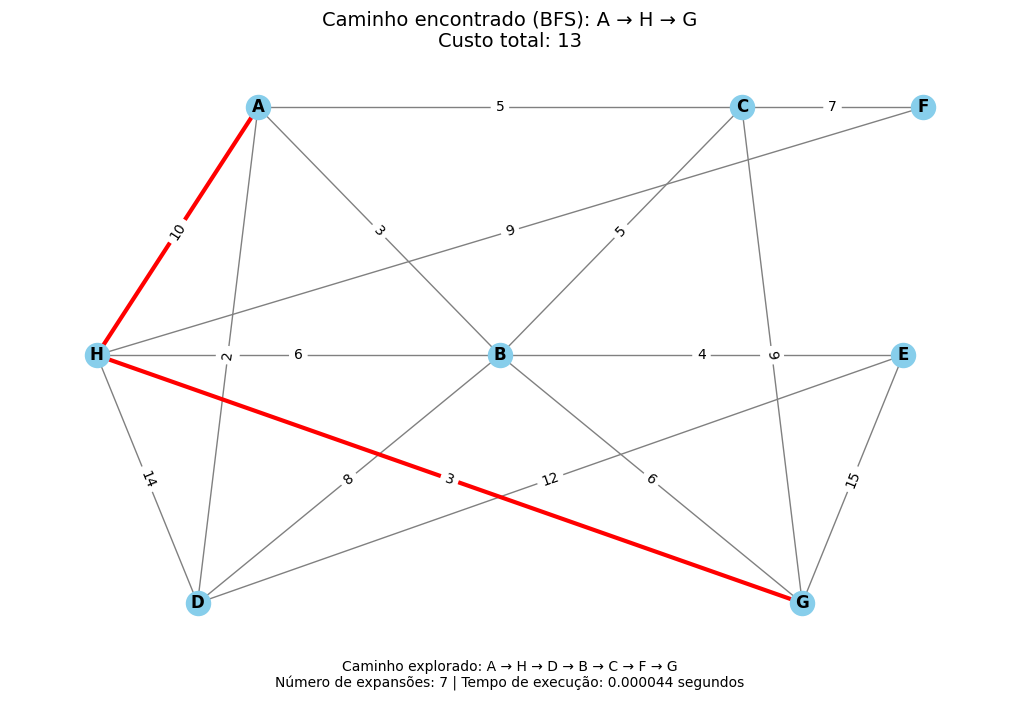

In [5]:
# Execução do algoritmo BFS no grafo definido

# Define os vértices de início e fim
inicio = 'A'
destino = 'G'

# Marca o tempo de início
tempo_inicio = time.time()

# Executa o algoritmo
resultado = bfs(G, inicio, destino)

# Marca o tempo de término
tempo_fim = time.time()
tempo_execucao = tempo_fim - tempo_inicio

# Exibe os resultados
print("\n========================[1.1 ALGORITMO: BUSCA EM LARGURA (BFS) ]========================\n")
print("Caminho explorado:", ' → '.join(resultado["visitados"]))
print("\nMelhor caminho encontrado:", ' → '.join(resultado["caminho"]))
if resultado["encontrado"]:
    custo_total = calcular_custo_total(G, resultado["caminho"])
    print(f"\nCusto total do caminho: {custo_total}")
    print(f"Número de expansões: {resultado['expansoes']}")
    print(f"Tempo de execução: {tempo_execucao:.6f} segundos")
    print("Chegou ao destino? Sim\n")
    visualizar_caminho(G, pos, resultado["caminho"], resultado["visitados"], tempo_execucao, "BFS")
else:
    print("Chegou ao destino? Não\n")


## Busca de Custo Uniforme (UCS)

### Definição de função UCS

In [6]:
# Implementação da Busca de Custo Uniforme (UCS)
def ucs(grafo, inicio, destino):
    """
    Executa a busca de custo uniforme em um grafo ponderado.
    Retorna caminho, nós visitados, expansões e flag de sucesso.
    """
    fila = [(0, inicio, [inicio])]  # (custo acumulado, nó atual, caminho)
    visitados = set()
    todos_visitados = []
    num_expansoes = 0

    while fila:
        custo, vertice, caminho = heapq.heappop(fila)

        if vertice not in visitados:
            visitados.add(vertice)
            todos_visitados.append(vertice)
            num_expansoes += 1

            if vertice == destino:
                return {
                    "encontrado": True,
                    "caminho": caminho,
                    "visitados": todos_visitados,
                    "expansoes": num_expansoes
                }

            for vizinho in grafo.neighbors(vertice):
                if vizinho not in visitados:
                    peso = grafo[vertice][vizinho]['weight']
                    heapq.heappush(fila, (custo + peso, vizinho, caminho + [vizinho]))

    return {
        "encontrado": False,
        "caminho": [],
        "visitados": todos_visitados,
        "expansoes": num_expansoes
    }

### Execução e análise da UCS


========================[1.2 ALGORITMO: BUSCA DE CUSTO UNIFORME (UCS) ]========================

Caminho explorado: A → D → B → C → E → G

Melhor caminho encontrado: A → B → G

Custo total do caminho: 9
Número de expansões: 6
Tempo de execução: 0.000057 segundos
Chegou ao destino? Sim



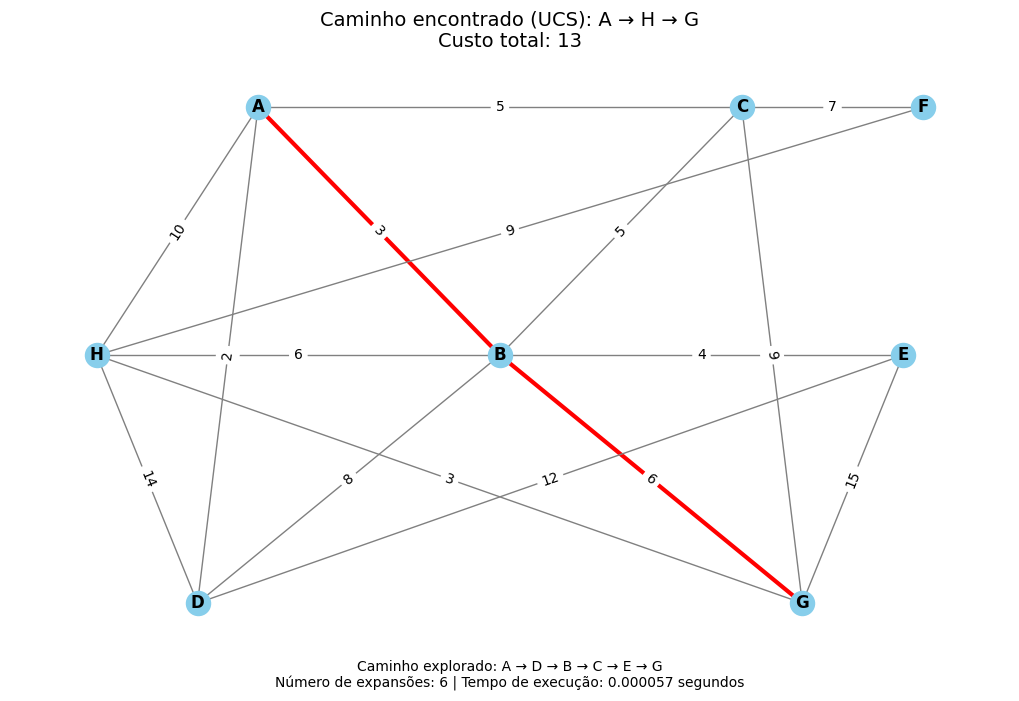

In [7]:
# Execução do algoritmo UCS no grafo

# Marca o tempo de início
tempo_inicio = time.time()

# Executa o algoritmo
resultado_ucs = ucs(G, inicio, destino)

# Marca o tempo de término
tempo_fim = time.time()
tempo_execucao_ucs = tempo_fim - tempo_inicio

# Exibe os resultados
print("\n========================[1.2 ALGORITMO: BUSCA DE CUSTO UNIFORME (UCS) ]========================\n")
print("Caminho explorado:", ' → '.join(resultado_ucs["visitados"]))
print("\nMelhor caminho encontrado:", ' → '.join(resultado_ucs["caminho"]))
if resultado_ucs["encontrado"]:
    custo_total = calcular_custo_total(G, resultado_ucs["caminho"])
    print(f"\nCusto total do caminho: {custo_total}")
    print(f"Número de expansões: {resultado_ucs['expansoes']}")
    print(f"Tempo de execução: {tempo_execucao_ucs:.6f} segundos")
    print("Chegou ao destino? Sim\n")
    visualizar_caminho(G, pos, resultado_ucs["caminho"], resultado_ucs["visitados"], tempo_execucao_ucs, "UCS")
else:
    print("Chegou ao destino? Não\n")

## Busca de Custo Uniforme (UCS)

### Definição da heurística

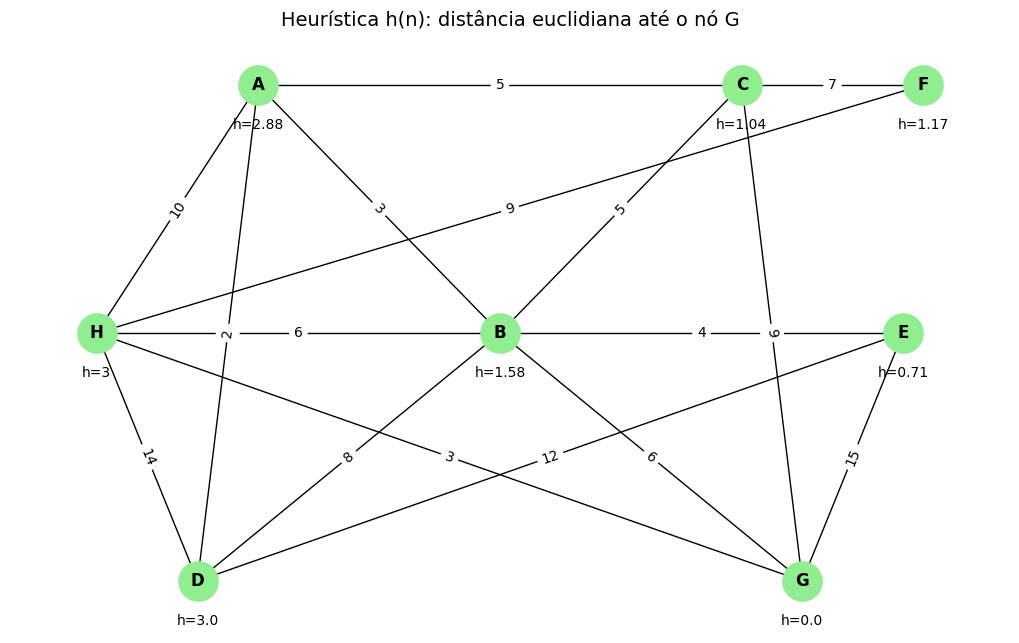

Cálculo de admissibilidade da heurística h(n) em relação ao custo real UCS (admissibilidade garantida):

Nó   h(n)    Custo real (UCS) até G     h(n) ≤ custo?
A    2.88    9                          Sim
B    1.58    6                          Sim
C    1.04    9                          Sim
D    3.0     11                         Sim
E    0.71    10                         Sim
F    1.17    12                         Sim
G    0.0     0                          Sim
H    3       3                          Sim


In [8]:
# Cálculo da heurística admissível com visualização corrigida

def calcular_heuristica_admissivel(grafo, pos, destino):
    """
    Calcula uma heurística admissível baseada na distância euclidiana até o destino.
    Se algum h(n) for maior que o custo real, ajusta para garantir admissibilidade.
    """
    heuristicas = {}
    for no in grafo.nodes:
        x1, y1 = pos[no]
        x2, y2 = pos[destino]
        distancia = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        heuristicas[no] = round(distancia, 2)

    # Corrige heurísticas para garantir que h(n) ≤ custo_real(n → G)
    for no in heuristicas:
        resultado_teste = ucs(grafo, no, destino)
        custo_real = calcular_custo_total(grafo, resultado_teste["caminho"]) if resultado_teste[
            "encontrado"] else float('inf')
        if heuristicas[no] > custo_real:
            heuristicas[no] = round(custo_real, 2)

    return heuristicas


# Calcula e aplica a heurística
heuristica = calcular_heuristica_admissivel(G, pos, destino='G')
G_heuristica = G.copy()
nx.set_node_attributes(G_heuristica, heuristica, name='h')

# Ajusta a posição dos labels para ficarem mais abaixo dos nós
h_labels = {n: f"h={v}" for n, v in heuristica.items()}
label_pos = {n: (x, y - 0.08) for n, (x, y) in pos.items()}

# Visualização do grafo com heurísticas
plt.figure(figsize=(10, 6))
nx.draw(G_heuristica, pos, with_labels=True, node_color='lightgreen', node_size=800, font_weight='bold')
nx.draw_networkx_labels(G_heuristica, label_pos, labels=h_labels, font_color='black', font_size=10)
nx.draw_networkx_edge_labels(G_heuristica, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("Heurística h(n): distância euclidiana até o nó G", fontsize=14)
plt.axis('off')
plt.show()

# Tabela de comparação final
print("Cálculo de admissibilidade da heurística h(n) em relação ao custo real UCS (admissibilidade garantida):\n")
print(f"{'Nó':<3}  {'h(n)':<6}  {'Custo real (UCS) até G':<25}  {'h(n) ≤ custo?'}")

for no in G.nodes:
    hn = heuristica[no]
    resultado_teste = ucs(G, no, 'G')
    custo_real = calcular_custo_total(G, resultado_teste["caminho"]) if resultado_teste["encontrado"] else float('inf')
    adm = "Sim" if hn <= custo_real else "Não"
    print(f"{no:<3}  {hn:<6}  {custo_real:<25}  {adm}")

### Definição da Busca Gulosa (Greedy Best-First Search)

In [9]:
# Implementação da busca Gulosa
def greedy(grafo, heuristica, inicio, destino):
    """
    Executa a busca gulosa com base na heurística h(n).
    Retorna caminho, nós visitados, expansões e flag de sucesso.
    """
    fila = [(heuristica[inicio], inicio, [inicio])]  # (h(n), nó atual, caminho até ele)
    visitados = set()
    todos_visitados = []
    num_expansoes = 0

    while fila:
        # Ordena pela menor heurística (comportamento de fila de prioridade)
        fila.sort()
        _, vertice, caminho = fila.pop(0)

        if vertice not in visitados:
            visitados.add(vertice)
            todos_visitados.append(vertice)
            num_expansoes += 1

            if vertice == destino:
                return {
                    "encontrado": True,
                    "caminho": caminho,
                    "visitados": todos_visitados,
                    "expansoes": num_expansoes
                }

            for vizinho in grafo.neighbors(vertice):
                if vizinho not in visitados:
                    fila.append((heuristica[vizinho], vizinho, caminho + [vizinho]))

    return {
        "encontrado": False,
        "caminho": [],
        "visitados": todos_visitados,
        "expansoes": num_expansoes
    }

### Execução da busca BFS e análise


========================[1.3 ALGORITMO: BUSCA GULOSA (GREEDY) ]========================

Caminho explorado: A → C → G

Melhor caminho encontrado: A → C → G

Custo total do caminho: 14
Número de expansões: 3
Tempo de execução: 0.000044 segundos
Chegou ao destino? Sim



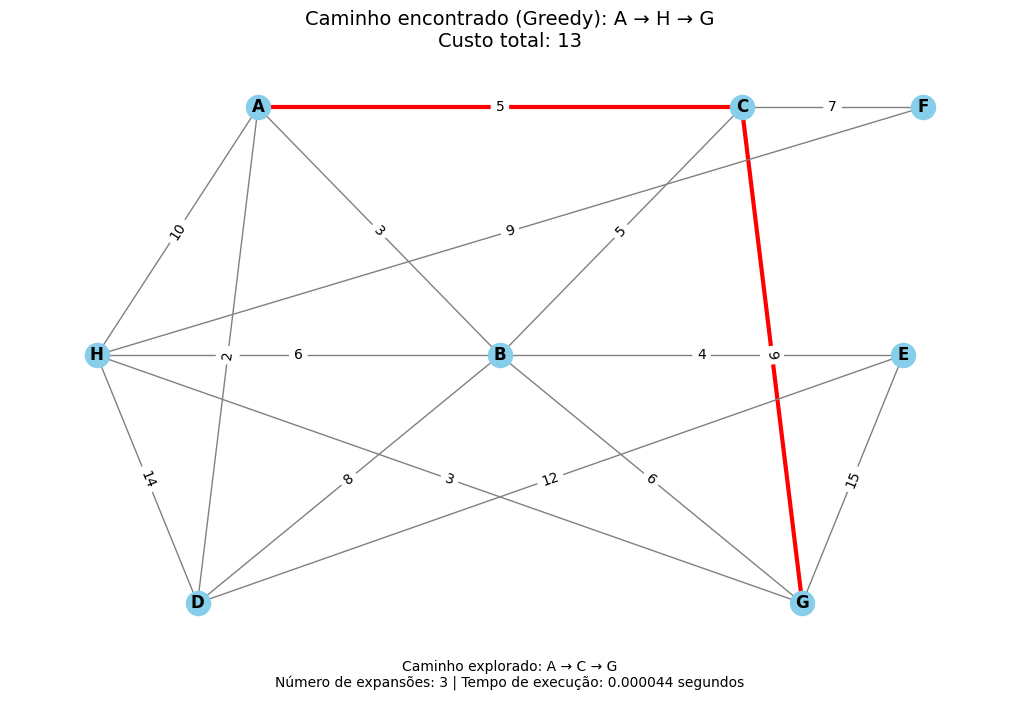

In [10]:
# Execução do algoritmo Greedy

# Marca o tempo de início
tempo_inicio = time.time()

# Executa a busca gulosa
resultado_greedy = greedy(G, heuristica, inicio, destino)

# Marca o tempo de término
tempo_fim = time.time()
tempo_execucao_greedy = tempo_fim - tempo_inicio

# Exibe os resultados
print("\n========================[1.3 ALGORITMO: BUSCA GULOSA (GREEDY) ]========================\n")
print("Caminho explorado:", ' → '.join(resultado_greedy["visitados"]))
print("\nMelhor caminho encontrado:", ' → '.join(resultado_greedy["caminho"]))

if resultado_greedy["encontrado"]:
    custo_total = calcular_custo_total(G, resultado_greedy["caminho"])
    print(f"\nCusto total do caminho: {custo_total}")
    print(f"Número de expansões: {resultado_greedy['expansoes']}")
    print(f"Tempo de execução: {tempo_execucao_greedy:.6f} segundos")
    print("Chegou ao destino? Sim\n")
    visualizar_caminho(G, pos, resultado_greedy["caminho"], resultado_greedy["visitados"], tempo_execucao_greedy,
                       "Greedy")
else:
    print("Chegou ao destino? Não\n")

## Busca A* (A-Star)

### Definição do algoritmo A*

In [11]:
# Implementação do algoritmo
def astar(grafo, heuristica, inicio, destino):
    """
    Executa o algoritmo A* (A estrela) usando g(n) + h(n).
    Retorna caminho, nós visitados, número de expansões e flag de sucesso.
    """
    fila = [(heuristica[inicio], 0, inicio, [inicio])]  # (f(n), g(n), nó atual, caminho)
    visitados = set()
    todos_visitados = []
    num_expansoes = 0

    while fila:
        # Ordena pela menor f(n)
        fila.sort()
        fn, gn, vertice, caminho = fila.pop(0)

        if vertice not in visitados:
            visitados.add(vertice)
            todos_visitados.append(vertice)
            num_expansoes += 1

            if vertice == destino:
                return {
                    "encontrado": True,
                    "caminho": caminho,
                    "visitados": todos_visitados,
                    "expansoes": num_expansoes
                }

            for vizinho in grafo.neighbors(vertice):
                if vizinho not in visitados:
                    custo = grafo[vertice][vizinho]['weight']
                    novo_gn = gn + custo
                    fn = novo_gn + heuristica[vizinho]
                    fila.append((fn, novo_gn, vizinho, caminho + [vizinho]))

    return {
        "encontrado": False,
        "caminho": [],
        "visitados": todos_visitados,
        "expansoes": num_expansoes
    }

### Execução de A* e análise


========================[1.4 ALGORITMO: BUSCA A* (A ESTRELA) ]========================

Caminho explorado: A → B → D → C → E → G

Melhor caminho encontrado: A → B → G

Custo total do caminho: 9
Número de expansões: 6
Tempo de execução: 0.000058 segundos
Chegou ao destino? Sim



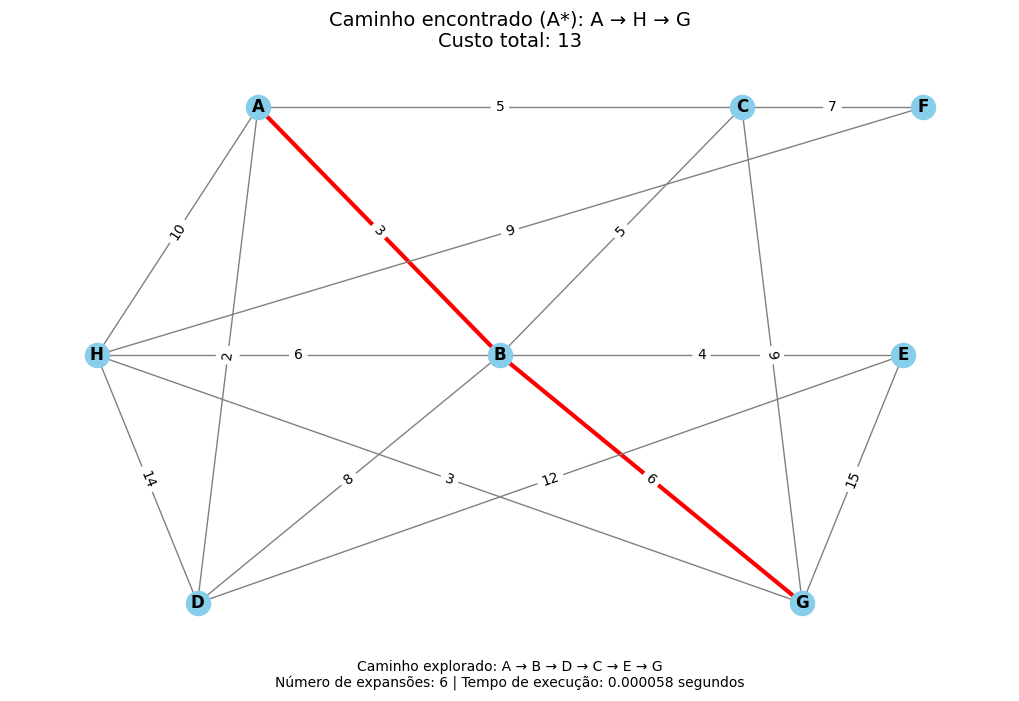

In [12]:
# Execução do algoritmo

# Marca o tempo de início
tempo_inicio = time.time()

# Executa o algoritmo A*
resultado_astar = astar(G, heuristica, inicio, destino)

# Marca o tempo de término
tempo_fim = time.time()
tempo_execucao_astar = tempo_fim - tempo_inicio

# Exibe os resultados
print("\n========================[1.4 ALGORITMO: BUSCA A* (A ESTRELA) ]========================\n")
print("Caminho explorado:", ' → '.join(resultado_astar["visitados"]))
print("\nMelhor caminho encontrado:", ' → '.join(resultado_astar["caminho"]))

if resultado_astar["encontrado"]:
    custo_total = calcular_custo_total(G, resultado_astar["caminho"])
    print(f"\nCusto total do caminho: {custo_total}")
    print(f"Número de expansões: {resultado_astar['expansoes']}")
    print(f"Tempo de execução: {tempo_execucao_astar:.6f} segundos")
    print("Chegou ao destino? Sim\n")
    visualizar_caminho(G, pos, resultado_astar["caminho"], resultado_astar["visitados"], tempo_execucao_astar, "A*")
else:
    print("Chegou ao destino? Não\n")

## Análise comparativa final
Abaixo disponibilizamos uma visualização dos métodos aplicados, onde é facilmente comparável o desempenho dos algoritmos nos quesitos Custo total do caminho [1], Número de nós expandidos [2] e Tempo de execução [3] expresso em milissegundos

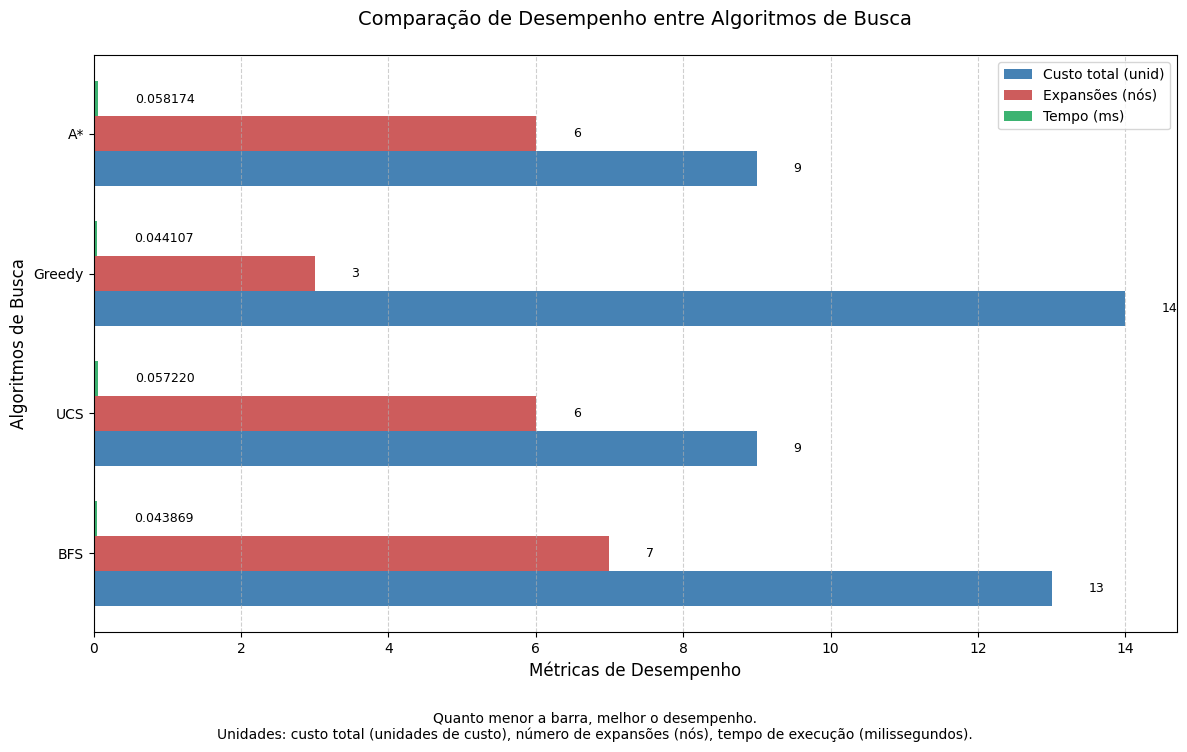

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Algoritmos avaliados
algoritmos = ['BFS', 'UCS', 'Greedy', 'A*']

# Extração dos dados
custos = [
    calcular_custo_total(G, resultado["caminho"]),
    calcular_custo_total(G, resultado_ucs["caminho"]),
    calcular_custo_total(G, resultado_greedy["caminho"]),
    calcular_custo_total(G, resultado_astar["caminho"])
]

expansoes = [
    resultado["expansoes"],
    resultado_ucs["expansoes"],
    resultado_greedy["expansoes"],
    resultado_astar["expansoes"]
]

tempos_ms = [
    round(tempo_execucao * 1000, 6),
    round(tempo_execucao_ucs * 1000, 6),
    round(tempo_execucao_greedy * 1000, 6),
    round(tempo_execucao_astar * 1000, 6)
]

# Posições para agrupamento das barras horizontais
y = np.arange(len(algoritmos))
height = 0.25

plt.figure(figsize=(12, 7))

bars1 = plt.barh(y - height, custos, height, label='Custo total (unid)', color='steelblue')
bars2 = plt.barh(y, expansoes, height, label='Expansões (nós)', color='indianred')
bars3 = plt.barh(y + height, tempos_ms, height, label='Tempo (ms)', color='mediumseagreen')

# Rótulos ao lado direito de cada barra
def anotar_barras_horizontais(barras, unidades):
    for bar in barras:
        largura = bar.get_width()
        plt.text(largura + 0.5, bar.get_y() + bar.get_height() / 2,
                 f'{largura:.6f}' if unidades == 'ms' else int(largura),
                 va='center', fontsize=9)

anotar_barras_horizontais(bars1, 'int')
anotar_barras_horizontais(bars2, 'int')
anotar_barras_horizontais(bars3, 'ms')

# Títulos e eixos
plt.ylabel('Algoritmos de Busca', fontsize=12)
plt.xlabel('Métricas de Desempenho', fontsize=12)
plt.title('Comparação de Desempenho entre Algoritmos de Busca\n', fontsize=14)

# Eixo Y com os nomes dos algoritmos
plt.yticks(y, algoritmos)
plt.legend(loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Nota explicativa
plt.figtext(0.5, -0.06,
            "Quanto menor a barra, melhor o desempenho.\nUnidades: custo total (unidades de custo), número de expansões (nós), tempo de execução (milissegundos).",
            wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()

# 2 - Otimização Local com Hill Climbing

## Hill Climbing Básico

### Definição das funções

In [14]:
# Importação das bibliotecas que ainda nao foram usadas
import numpy as np
#!pip install plotly <- para as visualizações interativas
import random
import plotly.graph_objects as go

In [15]:
# Definição da função objetivo
def f(x, y):
    """
    Função objetivo: f(x, y) = x² + y² + 25(sin²x + sin²y)
    """
    return x**2 + y**2 + 25 * (np.sin(x)**2 + np.sin(y)**2)

In [16]:
# Definição de Hill Climbing básico

def hill_climbing(f, x0, y0, step_size=0.1, max_iter=1000):
    """
    Hill Climbing simples para minimizar a função f(x, y)

    Parâmetros:
    - f: função objetivo
    - x0, y0: ponto inicial
    - step_size: tamanho do passo nas direções
    - max_iter: número máximo de iterações

    Retorna:
    - tupla (x, y) final
    - valor da função f(x, y)
    - trajetória (lista de pontos visitados)
    """
    x, y = x0, y0
    trajetoria = [(x, y)]

    for _ in range(max_iter):
        vizinhos = [
            (x + step_size, y),
            (x - step_size, y),
            (x, y + step_size),
            (x, y - step_size)
        ]

        # Avalia os vizinhos
        melhor = (x, y)
        for xn, yn in vizinhos:
            if f(xn, yn) < f(*melhor):
                melhor = (xn, yn)

        # Se nenhum vizinho melhora, para
        if melhor == (x, y):
            break

        x, y = melhor
        trajetoria.append((x, y))

    return x, y, f(x, y), trajetoria

In [17]:
# Função para visualização da superfície em 3D

def plot_surface(f, bounds=(-10, 10), resolution=100):
    """
    Plota a superfície 3D da função f(x, y) com Plotly
    """
    x = np.linspace(bounds[0], bounds[1], resolution)
    y = np.linspace(bounds[0], bounds[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])

    # Define a câmera: perpendicular ao eixo x, olhando de cima
    camera = dict(
        eye=dict(x=0.0, y=0.001, z=2.5),  # x≈0 = perpendicular ao eixo x; z>0 = olhando de cima
        up=dict(x=0, y=0, z=-1)  # vertical para baixo
    )

    fig.update_layout(
        title='Superfície da função f(x, y)',
        scene=dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title='f(x, y)'
        ),
        scene_camera=camera,
        height=700
    )
    fig.show()

In [18]:
# Função da trajetória do Hill Climbing

def plot_trajectory(f, trajectory, bounds=(-10, 10), resolution=100):
    """
    Plota a trajetória do Hill Climbing sobre a superfície da função f(x, y) com Plotly
    """
    x = np.linspace(bounds[0], bounds[1], resolution)
    y = np.linspace(bounds[0], bounds[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    traj_x = [p[0] for p in trajectory]
    traj_y = [p[1] for p in trajectory]
    traj_z = [f(x, y) for x, y in trajectory]

    # Cria a superfície
    surface = go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.8)

    # Cria a linha da trajetória
    trace_traj = go.Scatter3d(
        x=traj_x, y=traj_y, z=traj_z,
        mode='lines+markers',
        line=dict(color='red', width=4),
        marker=dict(size=4),
        name='Trajetória'
    )

    # Configura a câmera inicial
    camera = dict(
        eye=dict(x=0.0, y=0.001, z=2.5),
        up=dict(x=0, y=0, z=-1)
    )

    fig = go.Figure(data=[surface, trace_traj])
    fig.update_layout(
        title='Trajetória do Hill Climbing na superfície de f(x, y)',
        scene=dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title='f(x, y)'
        ),
        scene_camera=camera,
        height=700
    )
    fig.show()

### Execução das funções e visualização

In [19]:
# Ponto inicial aleatório
random.seed(568381) # Apenas para garantir reprodutibilidade nos testes. Comente essa linha para ter o efeito aleatório
x0, y0 = random.uniform(-10, 10), random.uniform(-10, 10)

# Executa Hill Climbing
x_final, y_final, valor_final, traj = hill_climbing(f, x0, y0)

print("="*60)
print(f"{'🏁 Resultado Final do Hill Climbing':^60}")
print("="*60)
print(f"{'x =':>25} {x_final:.4f}")
print(f"{'y =':>25} {y_final:.4f}")
print(f"{'f(x, y) =':>25} {valor_final:.4f}")
print(f"{'Total de passos =':>25} {len(traj)}")
print("="*60)

# Visualizações
plot_trajectory(f, traj)

             🏁 Resultado Final do Hill Climbing             
                      x = 3.0113
                      y = 6.0412
                f(x, y) = 47.4216
        Total de passos = 17


## Versão de Reinício Aleatório

In [20]:
# Definição do hill climbing de reinicio aleatório

def hill_climbing_restart(f, step_size=0.1, max_iter=1000, n_restarts=10, bounds=(-10, 10)):
    """
    Hill Climbing com múltiplos reinícios aleatórios

    Parâmetros:
    - f: função objetivo
    - step_size: tamanho do passo nas direções
    - max_iter: iterações por execução
    - n_restarts: número de reinícios aleatórios
    - bounds: intervalo de busca para x e y

    Retorna:
    - melhor_x, melhor_y, melhor_valor
    - lista com todas as trajetórias
    """
    melhor_valor = float('inf')
    melhor_solucao = None
    todas_trajetorias = []

    for i in range(n_restarts):
        random.seed(568381+i)
        x0 = random.uniform(bounds[0], bounds[1])
        y0 = random.uniform(bounds[0], bounds[1])

        x, y, valor, trajetoria = hill_climbing(f, x0, y0, step_size, max_iter)
        todas_trajetorias.append(trajetoria)

        if valor < melhor_valor:
            melhor_valor = valor
            melhor_solucao = (x, y)

        print(f"Reinício {i+1}: f({x:.4f}, {y:.4f}) = {valor:.4f} (passos = {len(trajetoria)})")

    return melhor_solucao[0], melhor_solucao[1], melhor_valor, todas_trajetorias

In [21]:
# Visualização das múltiplas trajetórias

def plot_multiple_trajectories(f, trajetorias, bounds=(-10, 10), resolution=100):
    """
    Plota todas as trajetórias do Hill Climbing com reinício aleatório
    """
    x = np.linspace(bounds[0], bounds[1], resolution)
    y = np.linspace(bounds[0], bounds[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    surface = go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.8)

    # Linhas de todas as trajetórias
    traj_lines = []
    for i, traj in enumerate(trajetorias):
        traj_x = [p[0] for p in traj]
        traj_y = [p[1] for p in traj]
        traj_z = [f(x, y) for x, y in traj]

        traj_lines.append(go.Scatter3d(
            x=traj_x, y=traj_y, z=traj_z,
            mode='lines+markers',
            line=dict(width=3),
            marker=dict(size=2),
            name=f"Reinício {i+1}"
        ))

    # Configuração da câmera
    camera = dict(
        eye=dict(x=0.0, y=0.001, z=2.5),
        up=dict(x=0, y=0, z=-1)
    )

    # Verificação se algum ponto atingiu o mínimo global estimado
    minimo_global_teorico = 0.0  # Aproximação visual do menor valor possível
    atingiu_minimo = any(abs(f(p[-1][0], p[-1][1]) - minimo_global_teorico) < 1e-3 for p in trajetorias)
    texto_extra = "<br><b>Pelo menos uma execução atingiu o mínimo global estimado!</b>" if atingiu_minimo else "<br><b>Nenhuma execução atingiu o mínimo global estimado.</b>"

    fig = go.Figure(data=[surface] + traj_lines)
    fig.update_layout(
        title=dict(
            text='Trajetórias do Hill Climbing com Reinício Aleatório',
            x=0.5,
            font=dict(size=18)
        ),
        scene=dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title='f(x, y)'
        ),
        scene_camera=camera,
        annotations=[
            dict(
                text=f"Cada linha representa uma execução independente.<br>Melhor valor final: menor f(x, y).{texto_extra}",
                xref="paper", yref="paper",
                x=0.5, y=-0.15,
                showarrow=False,
                font=dict(size=12),
                align="center"
            )
        ],
        height=700,
        legend=dict(
            x=0.01,
            y=0.99,
            bgcolor='rgba(255,255,255,0.6)',
            bordercolor='black',
            borderwidth=1,
            font=dict(size=12)
        ),
    )
    fig.show()

### Execução final e visualização

In [22]:
# Execução com múltiplos reinícios
x_best, y_best, f_best, trajetorias = hill_climbing_restart(f, n_restarts=10)

# Resultado formatado
print("="*60)
print(f"{'Melhor Solução Global com Reinício Aleatório':^60}")
print("="*60)
print(f"{'x =':>25} {x_best:.4f}")
print(f"{'y =':>25} {y_best:.4f}")
print(f"{'f(x, y) =':>25} {f_best:.4f}")
print("="*60)

# Visualização
plot_multiple_trajectories(f, trajetorias)

Reinício 1: f(3.0113, 6.0412) = 47.4216 (passos = 17)
Reinício 2: f(-3.0339, -9.0105) = 94.7332 (passos = 9)
Reinício 3: f(9.0676, -6.0778) = 123.2571 (passos = 8)
Reinício 4: f(-9.0601, -3.0634) = 94.8025 (passos = 13)
Reinício 5: f(-3.0439, 8.9892) = 94.7595 (passos = 10)
Reinício 6: f(6.0102, 6.0357) = 75.8696 (passos = 14)
Reinício 7: f(-6.0028, 5.9838) = 75.9286 (passos = 22)
Reinício 8: f(9.0330, 3.0022) = 94.7358 (passos = 20)
Reinício 9: f(-2.9905, 0.0382) = 9.5474 (passos = 24)
Reinício 10: f(-0.0152, -6.0117) = 37.9443 (passos = 6)
        Melhor Solução Global com Reinício Aleatório        
                      x = -2.9905
                      y = 0.0382
                f(x, y) = 9.5474
